## **1. Introduction**
***1.1. Getting all AFrican Countries**

In [1]:
!pip install wbdata --quiet

# All the countries is Africa

world_bank_country_ids = {
    'DZA': 'Algeria',
    'AGO': 'Angola',
    'BEN': 'Benin',
    'BWA': 'Botswana',
    'BFA': 'Burkina Faso',
    'BDI': 'Burundi',
    'CPV': 'Cabo Verde',
    'CMR': 'Cameroon',
    'CAF': 'Central African Republic',
    'TCD': 'Chad',
    'COM': 'Comoros',
    'COG': 'Congo, Rep.',
    'COD': 'Congo, Dem. Rep.',
    'DJI': 'Djibouti',
    'EGY': 'Egypt, Arab Rep.',
    'GNQ': 'Equatorial Guinea',
    'ERI': 'Eritrea',
    'SWZ': 'Eswatini',
    'ETH': 'Ethiopia',
    'GAB': 'Gabon',
    'GMB': 'Gambia, The',
    'GHA': 'Ghana',
    'GIN': 'Guinea',
    'GNB': 'Guinea-Bissau',
    'CIV': "Cote d'Ivoire",
    'KEN': 'Kenya',
    'LSO': 'Lesotho',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'MDG': 'Madagascar',
    'MWI': 'Malawi',
    'MLI': 'Mali',
    'MRT': 'Mauritania',
    'MUS': 'Mauritius',
    'MAR': 'Morocco',
    'MOZ': 'Mozambique',
    'NAM': 'Namibia',
    'NER': 'Niger',
    'NGA': 'Nigeria',
    'RWA': 'Rwanda',
    'STP': 'Sao Tome and Principe',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'SLE': 'Sierra Leone',
    'SOM': 'Somalia',
    'ZAF': 'South Africa',
    'SSD': 'South Sudan',
    'SDN': 'Sudan',
    'TZA': 'Tanzania',
    'TGO': 'Togo',
    'TUN': 'Tunisia',
    'UGA': 'Uganda',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}



# **IMPORT PACHAGES AND AUTHENTICATE GOOGLE DRIVE**

# <SPAN STYLE="COLOR:RED"> IF YOU ARE USING COLAB </span>

In [2]:
# import requests
# import json

# from google.colab import drive # this one is used to use google drive into colab
# from google.colab import auth  # Authenticate the drive to colab notebook.
# import gspread
# from google.auth import default
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')


# drive.mount('/content/drive')
# auth.authenticate_user()

# creds, _ = default()
# gc = gspread.authorize(creds)

# import wbdata

# <SPAN STYLE="COLOR:RED"> IF YOU ARE NOT USING COLAB </span>

In [3]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata

import warnings
import geopandas as gpd

from matplotlib.patches import FancyArrowPatch
import matplotlib.font_manager as fm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import pandas as pd
import gc  # For garbage collection


warnings.filterwarnings('ignore')





## **Get the GSMA index data from their website and filter SSA**

In [4]:
# !pip install openpyxl --quiet
gsma_index = pd.read_excel('https://www.mobileconnectivityindex.com/assets/excelData/MCI_Data_2024.xlsx', sheet_name='Index Scores',skiprows=2)
sub_saharan_africa = gsma_index[gsma_index['ISO Code'].isin(world_bank_country_ids.keys()) ]

In [5]:
# sub_saharan_afric

gsma_index = pd.pivot_table(sub_saharan_africa,
                             values='Index',
                             index='Year',
                             columns='ISO Code',
                            #  aggfunc='mean',
                          fill_value=np.nan)

Literacy_rate = pd.pivot_table(sub_saharan_africa,
                             values='Literacy',
                             index='Year',
                             columns='ISO Code',
                            #  aggfunc='mean',
                          fill_value=np.nan)

# **VISUALIZE THE LITERACY RATE FOR FEW DIFFERENT YEARS**

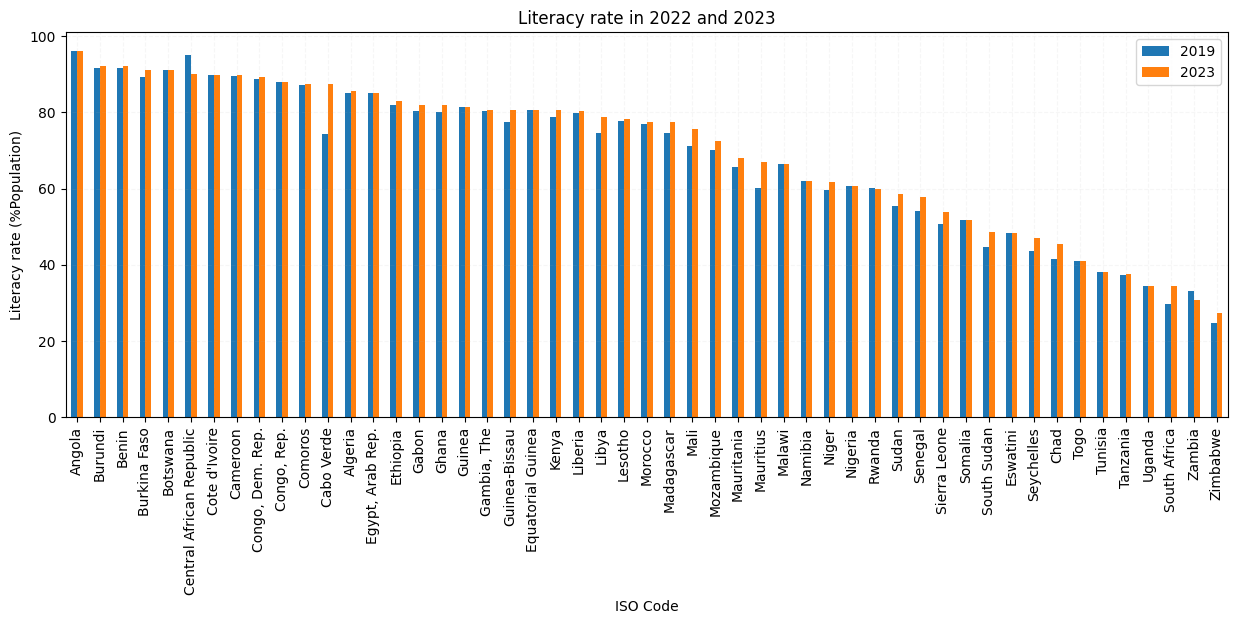

In [6]:
ax = Literacy_rate[(Literacy_rate.index).isin([2019, 2023])].T.sort_values(by=[2023], ascending=False).plot(kind='bar', figsize=(15, 5), legend=False)
country_names = [world_bank_country_ids.get(iso_code, iso_code) for iso_code in Literacy_rate.columns]
ax.set_xticklabels(country_names, rotation=90)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.1)
plt.ylabel('Literacy rate (%Population)')
plt.title('Literacy rate in 2022 and 2023')
plt.show()

# **VISUALIZE THE TIMESERIES OF GSMA INDEX SCORE FROM 2014 TO 2023**

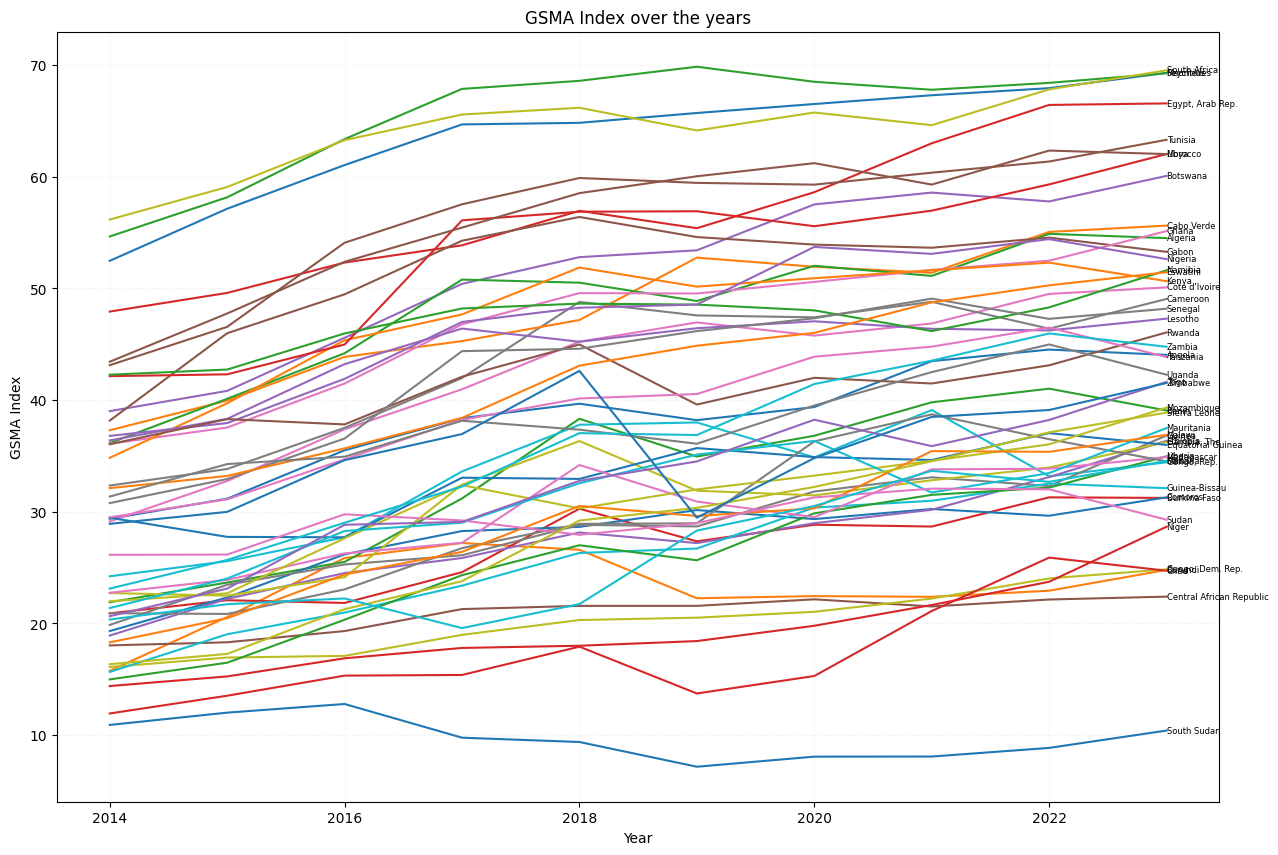

In [7]:
bax = gsma_index.plot(figsize=(15, 10), legend=False)
country_names = [world_bank_country_ids.get(iso_code, iso_code) for iso_code in gsma_index.columns]
for country, country_name in zip(gsma_index.columns, country_names):
    bax.text(2023, gsma_index[country].dropna().iloc[-1], country_name, va='center', ha='left', fontsize=6, color='black', zorder=30)

plt.grid(True, linestyle='--', alpha=0.1)
plt.ylabel('GSMA Index')
plt.title('GSMA Index over the years')

plt.show()

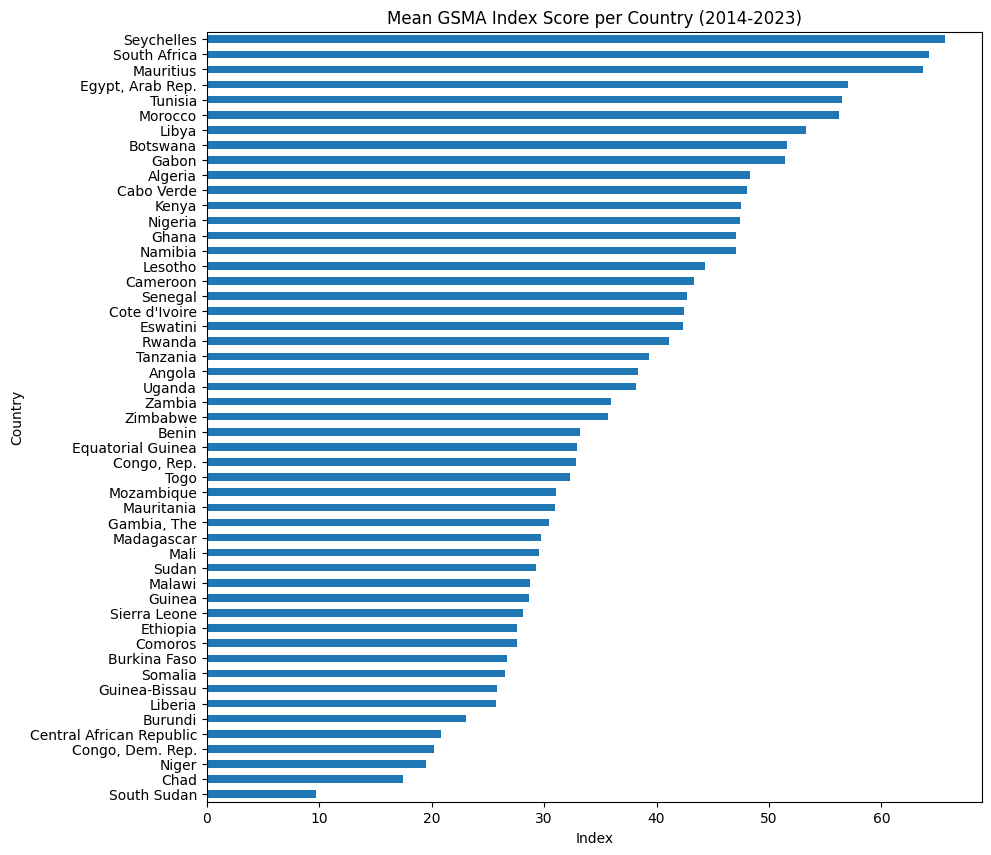

In [8]:
mean_gsma_index = gsma_index.mean(axis=0).sort_values(ascending=True)
ax = mean_gsma_index.plot(kind='barh', figsize=(10, 10), xlabel='Index', ylabel='Country', title='Mean GSMA Index Score per Country (2014-2023)')

country_names = [world_bank_country_ids.get(iso_code, iso_code) for iso_code in mean_gsma_index.index]
ax.set_yticklabels(country_names)
plt.show()


## **Get the number of countries represented in the GSMA index**

In [9]:
# Get the iso codes for all Sub-Saharan Africa countries which are available in GSMA indicator
worl_countries = pd.DataFrame(wbdata.get_countries())[['id','name']]
africa_countries = worl_countries[worl_countries['id'].isin(sub_saharan_africa['ISO Code'])]
africa_countries.reset_index(drop=True,inplace=True)

# print(f"The dataset has only {africa_countries.shape[0]} countries in Africa")
# print(africa_countries['name'].unique())



# **Get Population Data To help In normalization**

In [10]:
african_population = wbdata.get_dataframe(indicators  = {'SP.POP.TOTL': 'Population', 'NY.GDP.MKTP.CD':'GDP (curent$)','SE.ADT.LITR.ZS':'Literacy rate'},
                                          country = world_bank_country_ids.keys(), date = ('2009','2024'), keep_levels=True).reset_index()

# matching codes
for code, name in world_bank_country_ids.items():
    african_population.loc[african_population['country'] == name, 'country_code'] = code


african_population_pvt =pd.pivot_table(african_population,
                             values='Population',
                             index='date',
                             columns='country_code',
                             aggfunc=sum,
                             fill_value=np.nan)
african_gdp_pvt =pd.pivot_table(african_population,
                             values='GDP (curent$)',
                             index='date',
                             columns='country_code',
                             aggfunc=sum,
                             fill_value=np.nan)

# **1.O READ THE CRUNCHBASE DATA AND PREPROSES IT**.

In [11]:

# Open the Google Sheet by its ID
# sheet_id = '18k8I7iBHt6FdWzogrAPQ-cmAR5wN1oHkwNS7ou6WTrk'
# worksheet = gc.open_by_key(sheet_id).get_worksheet(0)

# # Get all values from the sheet
# rows = worksheet.get_all_values()
# # Create a dataframe
# df = pd.DataFrame(rows[1:], columns=rows[0])
# # df = df.iloc[:295, :-6]
# # Replace blank space with NaN
# df = df.replace('', 0)
path = 'Crunshase Funding.csv'
df = pd.read_excel(path)

display(df.head())
display(df.columns)
df['Year'] = df['Announced Date'].dt.year

df['Country'] = df['Organization Location'].apply(lambda x: x.split(', ')[-2])


# df['Announced Date'] = pd.to_datetime(df['Announced Date'])
# # df['Money Raised (in USD)'] = df['Money Raised (in USD)']#.astype(float)
# df['Number of Investors'] = df['Number of Investors'].astype(int)
# df['Money Raised'] = df['Money Raised'].astype(float)
# df['Number of Funding Rounds'] = df['Number of Funding Rounds'].astype(int)
# df['Total Funding Amount'] = df['Total Funding Amount'].astype(float)
# df['Total Funding Amount (in USD)'] = df['Total Funding Amount (in USD)'].astype(float)


# change the country name to the country codes
# Get the first matching key

# change  = lambda x: world_bank_country_ids.keys()[world_bank_country_ids.values().index(x)] if x in world_bank_country_ids.values() else x




# df['Country'] = df['Country'].apply(change)



,Transaction Name,Transaction Name URL,Organization Industries,Organization Location,Organization Name,Organization Name URL,Funding Type,Money Raised,Money Raised Currency,Money Raised (in USD),Announced Date,Funding Stage,Equity Only Funding,Number of Funding Rounds,Funding Status,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Number of Investors
0,Private Equity Round - Origin Holdings,https://www.crunchbase.com/funding_round/origi...,"Finance, Health Care, Venture Capital","Lagos, Lagos, Nigeria, Africa",Origin Holdings,https://www.crunchbase.com/organization/origin...,Private Equity,126016455,USD,126016455,2010-01-07,Private Equity,Yes,4,NaN,137016455,USD,137016455,NaN
1,Venture Round - Real People Home Finance,https://www.crunchbase.com/funding_round/real-...,"Banking, Communities, Credit, Financial Services","Gauteng, NA - South Africa, South Africa, Africa",Real People Home Finance,https://www.crunchbase.com/organization/real-p...,Venture - Series Unknown,100000000,ZAR,13196299,2010-01-28,NaN,Yes,2,NaN,33196299,USD,33196299,1.0
2,Debt Financing - Aquila Leasing,https://www.crunchbase.com/funding_round/aquil...,"Asset Management, Finance, Financial Services,...","Lagos, Lagos, Nigeria, Africa",Aquila Leasing,https://www.crunchbase.com/organization/aquila...,Debt Financing,3828000,EUR,5276259,2010-02-09,NaN,No,2,NaN,7828000,EUR,9616019,1.0
3,Series A - 4AFRI,https://www.crunchbase.com/funding_round/4afri...,"Information Technology, Mobile Apps, SMS, Vent...","Addis Ababa, Adis Abeba, Ethiopia, Africa",4AFRI,https://www.crunchbase.com/organization/4afri,Series A,1000000,USD,1000000,2010-05-05,Early Stage Venture,Yes,2,Early Stage Venture,1150000,USD,1150000,1.0
4,Post-IPO Equity - Ecobank,https://www.crunchbase.com/funding_round/ecoba...,"Banking, Finance, Financial Services","LomÃ©, Maritime, Togo, Africa",Ecobank,https://www.crunchbase.com/organization/ecoban...,Post-IPO Equity,14000000,USD,14000000,2010-07-28,NaN,Yes,16,IPO,1941398380,USD,1941398380,1.0


Index(['Transaction Name', 'Transaction Name URL', 'Organization Industries',
       'Organization Location', 'Organization Name', 'Organization Name URL',
       'Funding Type', 'Money Raised', 'Money Raised Currency',
       'Money Raised (in USD)', 'Announced Date', 'Funding Stage',
       'Equity Only Funding', 'Number of Funding Rounds', 'Funding Status',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount (in USD)', 'Number of Investors'],
      dtype='object')

In [12]:
countries = df['Country'].unique()
print(f'The dataset has {len(countries)} countries:\n\n', countries)

The dataset has 42 countries:

 ['Nigeria' 'South Africa' 'Ethiopia' 'Togo' 'Kenya' 'Tunisia' 'Senegal'
 'Zambia' 'Ghana' 'Morocco' 'Tanzania' 'Egypt' "CÃ´te d'Ivoire" 'Zimbabwe'
 'Mauritius' 'Uganda' 'Algeria' 'Malawi' 'Botswana'
 'Democratic Republic of' 'Rwanda' 'Seychelles' 'Cameroon' 'Mauritania'
 'Mali' 'Burkina Faso' 'Sierra Leone' 'Gambia' 'Lesotho' 'Gabon' 'Namibia'
 'Burundi' 'Angola' 'Chad' 'Madagascar' 'Djibouti' 'Congo' 'Liberia'
 'Guinea' 'Somalia' 'Benin' 'Mozambique']


In [13]:
# new code
country_name_mapping = {
    # mapping country names
    "CÃ´te d'Ivoire": "Cote d'Ivoire",
    "Democratic Republic of": "Congo, Dem. Rep.",
    "Gambia": "Gambia, The",
    "Congo": "Congo, Rep.",  
    "Egypt": "Egypt, Arab Rep.", 
}
df['Country'] = df['Country'].replace(country_name_mapping)
# matching codes
for code, name in world_bank_country_ids.items():
    df.loc[df['Country'] == name, 'country_code'] = code

print(len(df['country_code'].unique()))

42


In [14]:
a = [Literacy_rate,
gsma_index,
african_gdp_pvt,
df]

#### **Check the number of columns we have on clunchabase data**

In [15]:
print(f"The dataset has {df.shape[1]} columns")
print(df.columns)

The dataset has 22 columns
Index(['Transaction Name', 'Transaction Name URL', 'Organization Industries',
       'Organization Location', 'Organization Name', 'Organization Name URL',
       'Funding Type', 'Money Raised', 'Money Raised Currency',
       'Money Raised (in USD)', 'Announced Date', 'Funding Stage',
       'Equity Only Funding', 'Number of Funding Rounds', 'Funding Status',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount (in USD)', 'Number of Investors', 'Year',
       'Country', 'country_code'],
      dtype='object')


In [16]:
# df['Organization Location'][1].split(',')[-2]


# df['Country'].replace("Cabo Verde","Cape Verde",inplace=True)
# # df['Country'].replace("Congo (Brazzaville)","Congo-Brazzaville",inplace=True)

unique_countries = df['Country'].unique()
print(f'Only {len(unique_countries)} countries were represeted in the dataset \n {unique_countries}')

Only 42 countries were represeted in the dataset 
 ['Nigeria' 'South Africa' 'Ethiopia' 'Togo' 'Kenya' 'Tunisia' 'Senegal'
 'Zambia' 'Ghana' 'Morocco' 'Tanzania' 'Egypt, Arab Rep.' "Cote d'Ivoire"
 'Zimbabwe' 'Mauritius' 'Uganda' 'Algeria' 'Malawi' 'Botswana'
 'Congo, Dem. Rep.' 'Rwanda' 'Seychelles' 'Cameroon' 'Mauritania' 'Mali'
 'Burkina Faso' 'Sierra Leone' 'Gambia, The' 'Lesotho' 'Gabon' 'Namibia'
 'Burundi' 'Angola' 'Chad' 'Madagascar' 'Djibouti' 'Congo, Rep.' 'Liberia'
 'Guinea' 'Somalia' 'Benin' 'Mozambique']


In [17]:
pivot_table = pd.pivot_table(df,
                             values='Money Raised (in USD)',
                             index='Year',
                             columns='country_code',
                             aggfunc='sum',
                             fill_value=np.nan)
pivot_table_with_names = pivot_table.rename(columns=world_bank_country_ids)

print('This is how the data look like when it comes after pivoting')
display(pivot_table_with_names.T)

This is how the data look like when it comes after pivoting


Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country_code,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+04,NaN,NaN,NaN
Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1247461.0,NaN,NaN,5.000000e+06,2.000000e+07
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+03,NaN,NaN
Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,1584171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.233430e+06
Botswana,NaN,NaN,NaN,NaN,600000.0,500000.0,400000.0,25350000.0,NaN,1000000.0,NaN,6.000000e+05,NaN,5.000000e+03,7.500000e+06
Cote d'Ivoire,NaN,NaN,8339930.0,NaN,NaN,NaN,100000000.0,NaN,692291774.0,3400205.0,28693914.0,7.005767e+07,8.681832e+07,3.717291e+07,5.815061e+06
Cameroon,NaN,NaN,NaN,NaN,NaN,650000.0,100000.0,NaN,250000.0,690499.0,1443807.0,5.203566e+06,1.587770e+05,2.899080e+05,1.200000e+05
"Congo, Dem. Rep.",NaN,NaN,NaN,NaN,7896383.0,NaN,NaN,NaN,NaN,NaN,100000.0,5.000000e+07,2.500000e+05,5.000000e+05,1.000000e+08
"Congo, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097817e+07,NaN


In [18]:
# pivot_table
def normalise(investment, normalizer):
  normalised_invesyment = pd.DataFrame()
  for country in investment.columns:
        normalised_invesyment[country] = investment[country].values / normalizer[country].values[1:]
   
  african_population_pvt

  normalised_invesyment.index = investment.index
  # normalised_invesyment

  return normalised_invesyment




# MONEY RAISED

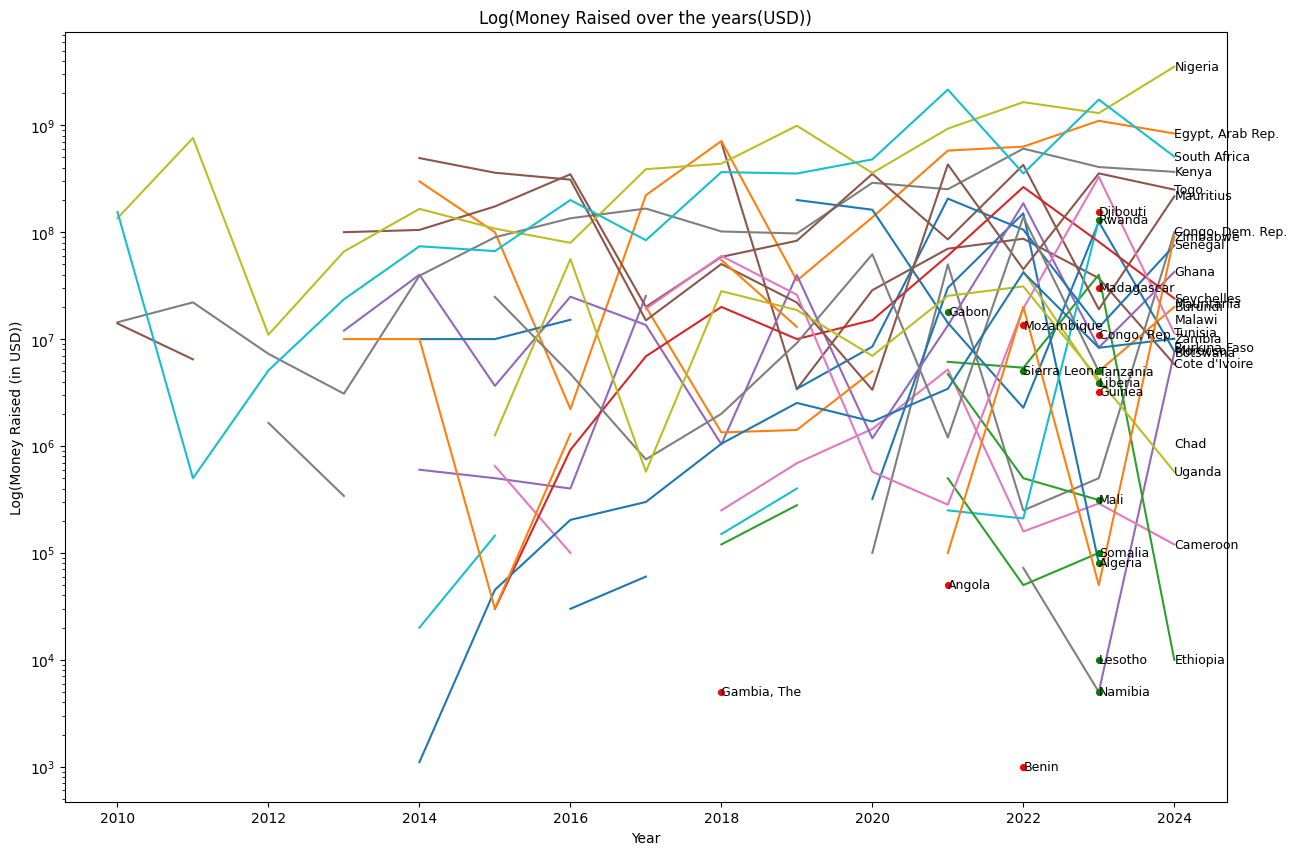

In [19]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))
pivot_table.plot(ax=ax, legend=False)
# for country in pivot_table.columns:
#     ax.text(pivot_table[country].dropna().index[-1], pivot_table[country].dropna().iloc[-1] , country, va='center', ha='left',fontsize=10, color ='black',zorder=30)

for country_code in pivot_table.columns:
    country_data = pivot_table[country_code].dropna()
    if not country_data.empty:
        last_year = country_data.index[-1]
        last_value = country_data.iloc[-1]
        country_name = world_bank_country_ids.get(country_code, country_code)
        if last_year != 2024:
            color = 'red' if len(country_data) == 1 else 'green'
            ax.scatter(last_year, last_value, marker='o', s=17, c=color, zorder=30)
        ax.text(last_year, last_value, country_name, va='center', ha='left', fontsize=9, color='black', zorder=30)

# plt.ylim(0,500)
ax.set_ylabel('Log(Money Raised (in USD))')
ax.set_title('Log(Money Raised over the years(USD))')
ax.set_yscale('log')
plt.show()

# Display the plot
plt.show()

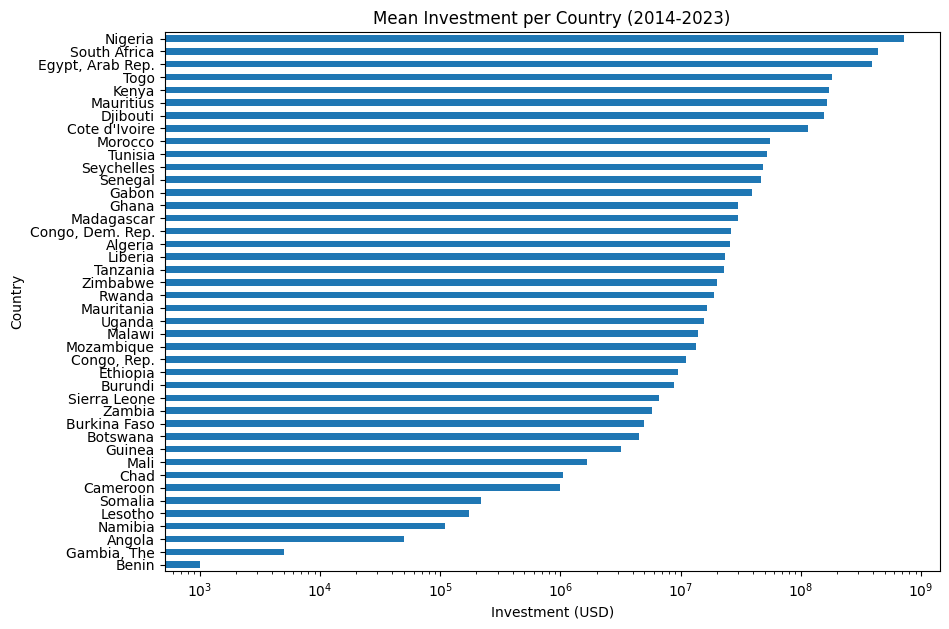

In [20]:


# Calculate the mean investment per country
mean_investment = pivot_table.mean(axis=0).sort_values(ascending=True)

# Map ISO codes to country names using the 'world_bank_country_ids' dictionary
country_names = [world_bank_country_ids.get(iso_code, iso_code) for iso_code in mean_investment.index]

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
mean_investment.plot(kind='barh', ax=ax, legend=False)

# Set the y-tick labels to the country names
ax.set_yticklabels(country_names)

# Set plot labels and title
ax.set_xlabel('Investment (USD)')
ax.set_ylabel('Country')
ax.set_title('Mean Investment per Country (2014-2023)')
ax.set_xscale('log')

# Display the plot
plt.show()


# **Normalize by the Total Population**

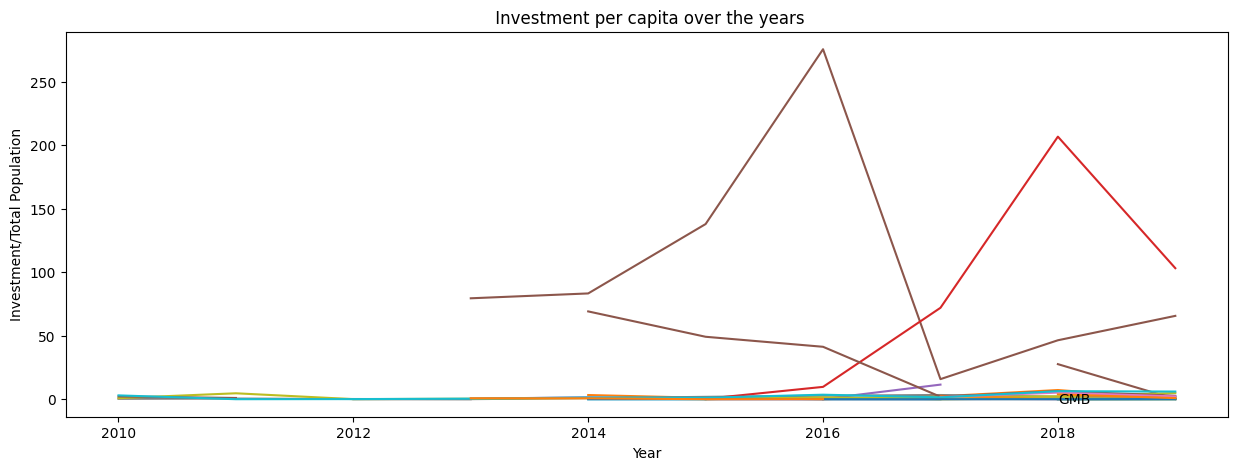

In [21]:

normalised_invesyment = normalise(pivot_table,african_population_pvt)


ax = normalised_invesyment.plot(figsize=(15, 5),legend = False)

for country in normalised_invesyment.columns:
    ax.text(normalised_invesyment[country].dropna().index[-1], normalised_invesyment[country].dropna().iloc[-1] , country, va='center', ha='left',fontsize=10, color ='black',zorder=30)


# plt.ylim(0,500)
ax.set_ylabel('Investment/Total Population')
ax.set_title(' Investment per capita over the years')

plt.show()

# **Normalise by Total National GDP**

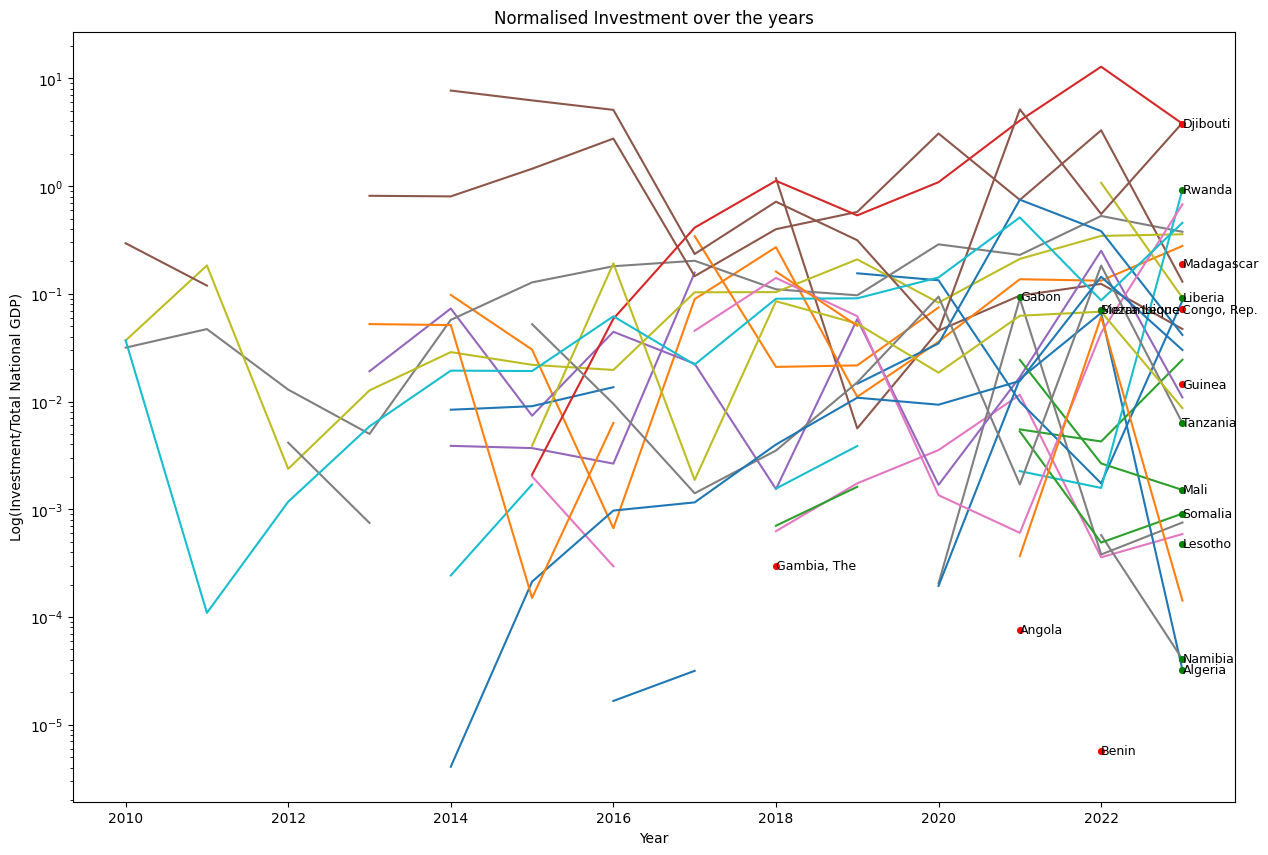

In [22]:

normalised_invesyment_byGDP = normalise(pivot_table,african_gdp_pvt)*100
ax = normalised_invesyment_byGDP.plot(figsize=(15, 10), legend=False)

for country in normalised_invesyment_byGDP.columns:
    last_year_in_data = normalised_invesyment[country].dropna().index[-1]
    last_amount = normalised_invesyment_byGDP[country].dropna().iloc[-1]
    
    if last_year_in_data != 2024:
        if len(normalised_invesyment[country].dropna().index) == 1:
            plt.scatter(last_year_in_data, last_amount, marker='o', s=17, c='red', zorder=30, label='Appears Once')
        else:
            plt.scatter(last_year_in_data, last_amount, marker='o', s=17, c='green', zorder=30)
    country_name = world_bank_country_ids.get(country, country) 
    ax.text(last_year_in_data, last_amount, country_name, va='center', ha='left', fontsize=9, color='black', zorder=30)

ax.set_yscale('log')
ax.set_ylabel('Log(Investment/Total National GDP)')
ax.set_title('Normalised Investment over the years')


plt.show()



# **Double normalization**

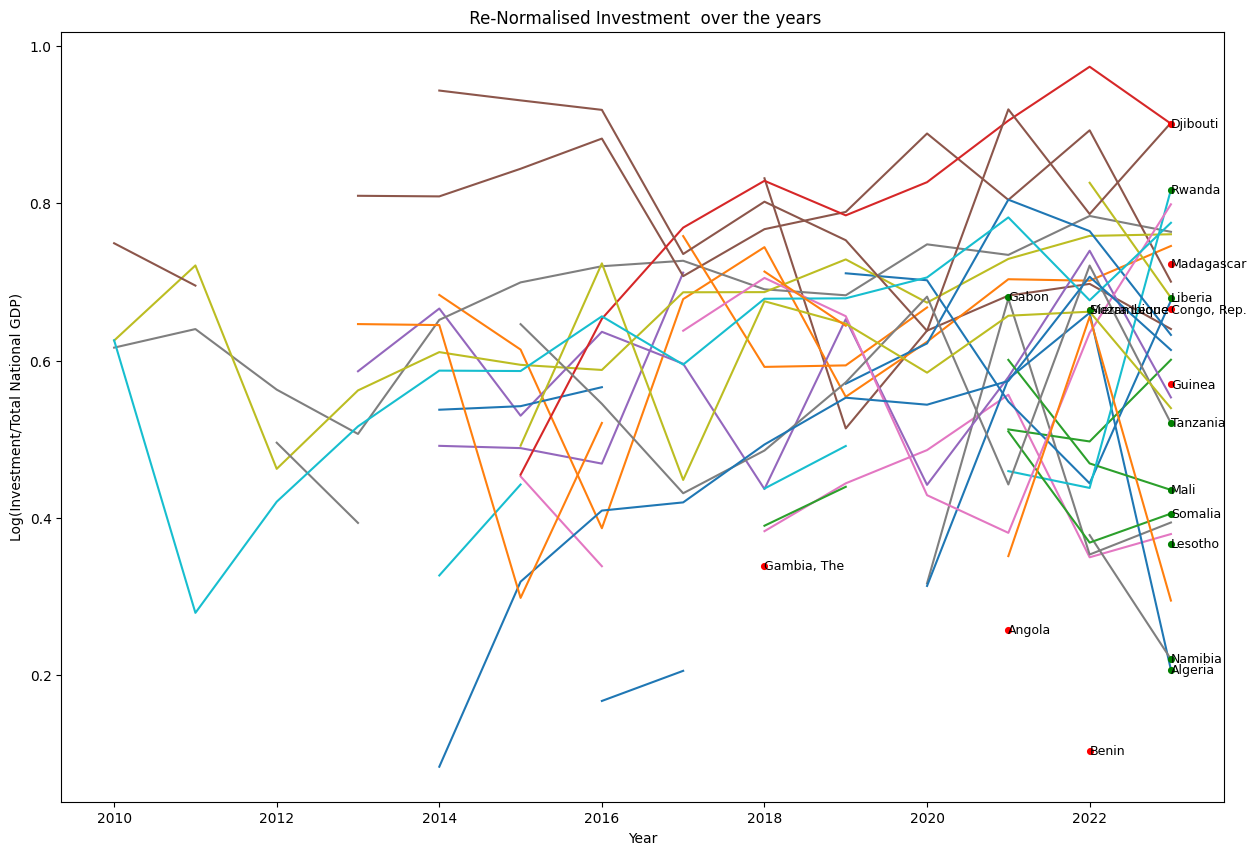

In [23]:
normlize = lambda x: (np.log(x) - np.log(10e-7)) / ((np.log(20)- np.log(10e-7)))
minmax_normalize = lambda x: (x - 10e-6) / (20 - 10e-6)


# Renormalise
normalised_invesyment_byGD = normalised_invesyment_byGDP.apply(normlize)

ax = normalised_invesyment_byGD.plot(figsize=(15, 10), legend=False, label='')

for country in normalised_invesyment_byGD.columns:
    last_year_in_data = normalised_invesyment_byGD[country].dropna().index[-1]
    last_amount = normalised_invesyment_byGD[country].dropna().iloc[-1]

    if last_year_in_data != 2024:
        if len(normalised_invesyment_byGD[country].dropna().index) == 1:
            plt.scatter(last_year_in_data, last_amount, marker='o', s=17, c='red', zorder=30, label='Appears Once')
        else:
            plt.scatter(last_year_in_data, last_amount, marker='o', s=17, c='green', zorder=30)

    country_name = world_bank_country_ids.get(country, country)  
    ax.text(last_year_in_data, last_amount, country_name, va='center', ha='left', fontsize=9, color='black', zorder=30)

# plt.ylim(0,500)
# ax.set_yscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Log(Investment/Total National GDP)')
ax.set_title(' Re-Normalised Investment  over the years')
# plt.legend()
plt.show()

# **Which Variables do we have so far?**

In [24]:


Investment =  normalised_invesyment_byGD.copy()         #normalised_invesyment_byGDP.interpolate(method='linear', axis=0,)
# normalised_invesyment = normalised_invesyment[normalised_invesyment.index.isin(range(2014, 2024))]
# gsma_index
# Literacy_rate



# **INDEX CALCULATOR**

In [25]:
class Index_calculation:
        def __init__(self,Investment =Investment, gsma_index = gsma_index ,Literacy_rate = Literacy_rate):
            self.Investment = Investment
            self.gsma_index = gsma_index/100
            self.Literacy_rate = Literacy_rate/100
            # display(self.Investment, self.gsma_index, self.Literacy_rate)
            # Get the current date and time
            from datetime import datetime
            current_datetime = datetime.now()

            # Access the year attribute
            self.current_year = current_datetime.year


        def calculate(self, year, sliding_window=1, plot=False, arthmetic=False):
          if sliding_window < 1:
              raise ValueError("The sliding window should be greater than 1")
          else:
              self.year = year
              self.start_year = year - sliding_window + 1

              if self.year < 2014:
                  raise ValueError("The year should be greater than 2014")
              elif self.year > self.current_year:
                  raise ValueError(f"The year should be less than {self.current_year} ")
              else:
                  Investment = self.Investment[(self.Investment.index).isin(range(self.start_year, self.year+1))].mean(axis=0)
                  gsma_index = self.gsma_index[(self.gsma_index.index).isin(range(self.start_year, self.year+1))].mean(axis=0)
                  Literacy_rate = self.Literacy_rate[(self.Literacy_rate.index).isin(range(self.start_year, self.year+1))].mean(axis=0)

                  if arthmetic:
                      index = (1/3)*Investment + (1/3)*gsma_index + (1/3)*Literacy_rate
                  else:
                      index = (Investment*gsma_index*Literacy_rate)**(1/3)

                  index = np.round(index, 2)

                  # Create combined_dataframe and map its index to full country names
                  self.combined_dataframe = pd.concat([Investment, gsma_index, Literacy_rate, index], axis=1)
                  self.combined_dataframe.columns = ['Investment', 'gsma_index', 'Literacy_rate', f'Index Score: {self.year}']

                  # keep country codes as columns
                  # self.combined_dataframe['ISO CODE'] = self.combined_dataframe.index
                  # self.combined_dataframe.index = self.combined_dataframe.index.map(world_bank_country_ids)

            # Map the index Series to full country names before plotting
              index.index = index.index.map(world_bank_country_ids)

              if plot:
                  sort = index.sort_values(ascending=True)
                  ax = sort.dropna().plot(kind='barh', figsize=(15, 10), ylabel='Index Score', xlabel='Country')
                  ax.set_title(f'FINTECH Index Score in {self.year} with sliding window ={sliding_window}')
                  plt.show()  # Ensure the plot is displayed

              # Prepare the returned index DataFrame with full country names
              index = index.reset_index()
              index.columns = ['Country', self.year]
              index = index.set_index('Country')
              self.combined_dataframe.index.name = 'ISO CODE'
              # self.combined_dataframe['Country Name'] = self.combined_dataframe.index.map(world_bank_country_ids)
              return index, self.combined_dataframe
        
        def index_over_the_years(self,  begin = 2014, end = 2024, sliding_window =1, arthmetic = False):
            self.begin = begin
            self.end = end
            self.end = end
            years = list(range(self.begin, self.end+1))
            self.years = years

            Final_scores = pd.DataFrame()
            break_down = pd.DataFrame()
            for year in years:
              index, _ = self.calculate(year = year, sliding_window = sliding_window, arthmetic = arthmetic)
              Final_scores = pd.concat([Final_scores, index], axis=1)
            Final_scores.columns = years
            return Final_scores

        # plot Final_scores
        def plot(self, begin=2014, end = 2024,seliding_window = 1, bar = False, line = False):
            scores = self.index_over_the_years(begin, end, seliding_window)
            scores = scores.T.dropna(how = 'all', axis = 1)

            def lineplot(score):
              ax = scores.plot(kind = 'line', figsize=(15, 8),legend = False)
              for country in scores.columns:
                ax.text(end, scores[country].dropna().iloc[-1] , country, va='center', ha='left',fontsize=7,zorder=30)


              plt.grid(True, linestyle = '--', alpha = 0.1)
              plt.ylabel('FINTECH Index Score')
              plt.title(f'FINTECH Index Score from {begin} to {end} with sliding window of: {seliding_window} ')
              # plt.legend(False)
              # plt.ylim(18,)
              plt.show()

            def barplot(score):
              scores.plot(kind = 'barh', figsize=(15, 5), legend = False)
              plt.show()

            if bar:
              barplot(scores)
            if line:
              lineplot(scores)

            if not bar and not line:
              raise ValueError("You did not select a plotter")

        def plot_break_down(self, year, sliding_window =1, plot = False, arthmetic = False, display_table = False):
          _, break_down = self.calculate(year = year, sliding_window = sliding_window, plot = False, arthmetic = arthmetic)
          break_down = break_down.sort_values(by=f'Index Score: {year}', ascending=True)

          

          # display the figure
          if display_table:
            break_down['Country Name'] = break_down.index.map(world_bank_country_ids)
            break_down.index.name = 'ISO CODE'
            display(break_down)
            break_down = break_down.drop(columns = ['Country Name'])


              

          new_breadown = pd.DataFrame()
          for column in ['Investment', 'gsma_index', 'Literacy_rate']:
              new_breadown[column] = break_down[column]*break_down[f'Index Score: {year}']/break_down.drop(columns=[f'Index Score: {year}']).sum(axis=1)

          # plot stacked horizontal barhraph
          new_breadown.dropna(inplace = True)

          if plot:
            new_breadown.index = new_breadown.index.map(world_bank_country_ids)
            ax = new_breadown.plot(kind = 'barh',stacked = True,xlabel='Total Score Breakdown (%)', ylabel='Country', figsize=(15, 10),legend = True)
            plt.grid(True, linestyle = '--', alpha = 0.1)
            plt.show()

# **RUN THE INDEX CALCULATOR**

In [26]:
Index_calculation().plot_break_down(year = 2023, sliding_window = 1, plot = False, arthmetic = False, display_table = True)

,Investment,gsma_index,Literacy_rate,Index Score: 2023,Country Name
ISO CODE,,,,,
MLI,0.435470,0.345176,0.307614,0.36,Mali
SOM,0.405402,0.345610,0.410250,0.39,Somalia
COD,0.394042,0.248492,0.805400,0.43,"Congo, Dem. Rep."
DZA,0.206723,0.545038,0.814078,0.45,Algeria
BWA,0.193295,0.600769,0.850000,0.46,Botswana
GIN,0.569629,0.368314,0.453300,0.46,Guinea
NAM,0.220143,0.516238,0.922500,0.47,Namibia
ZWE,0.294758,0.415358,0.898500,0.48,Zimbabwe
ETH,0.601013,0.363595,0.517712,0.48,Ethiopia


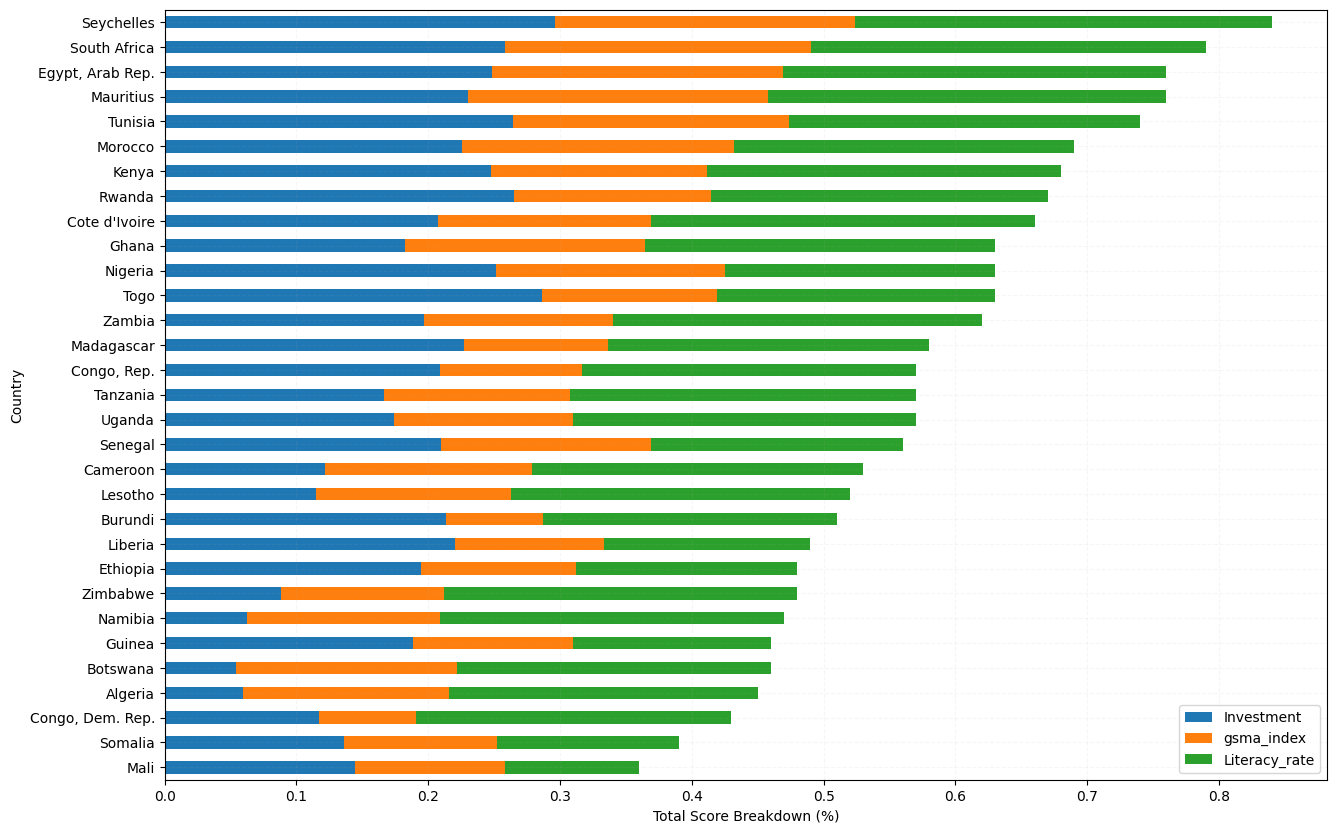

In [27]:
Index_calculation().plot_break_down(year = 2023, sliding_window = 1, plot = True, arthmetic = False, display_table = False)

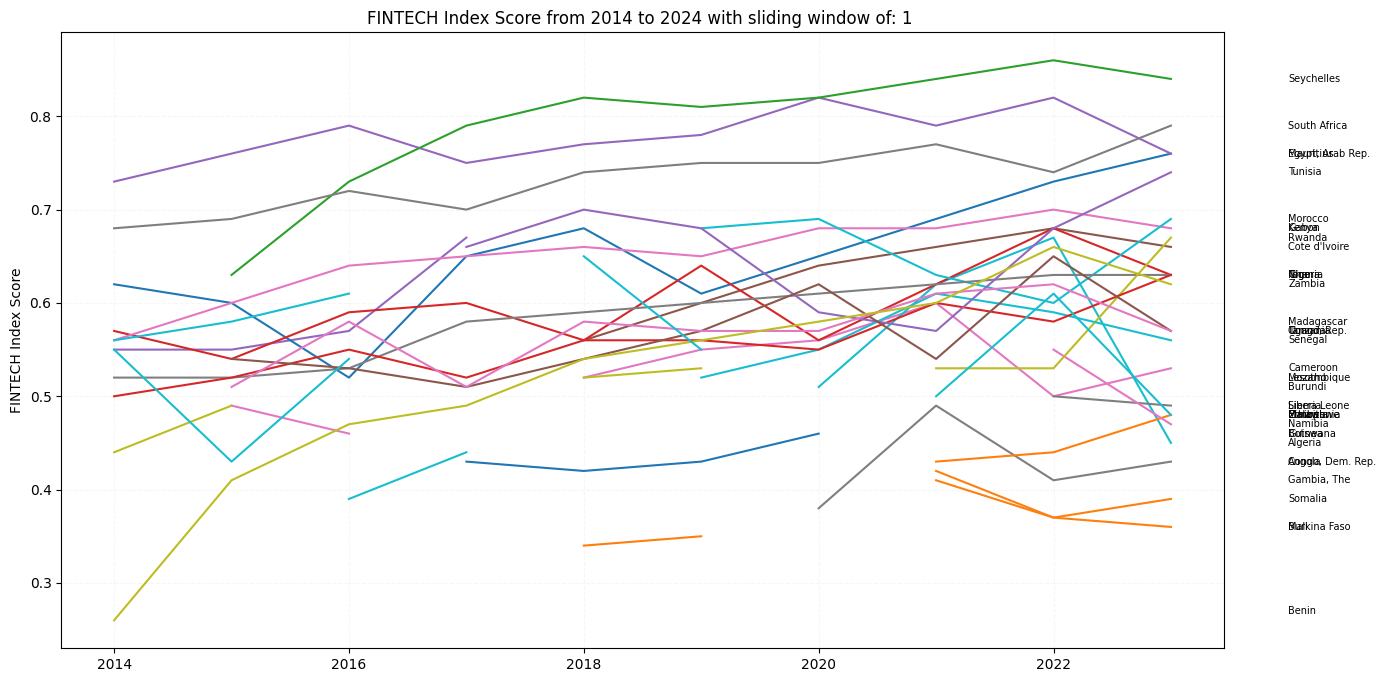

In [28]:
Index_calculation().plot(2014, 2024 ,1 , False, True)

# **Merge The index calculation to Map**

In [29]:
# merge afrca and index dataframe
import geopandas as gpd

from matplotlib.patches import FancyArrowPatch
import matplotlib.font_manager as fm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import pandas as pd
import gc  # For garbage collection



# Load the shapefile
shapefile_path = r"ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)



# **prepare the dataset for the map**

In [30]:

# Filter for African countries
africa = world[world['CONTINENT'] == 'Africa']
africa.rename(columns={'SOV_A3': 'ISO CODE'}, inplace=True)
# africa = pd.merge(dataframe, africa, how='left', left_on='ISO CODE', right_on='ISO CODE')

score_2024, dataframe = Index_calculation().calculate( 2023,1, False)
dataframe.reset_index(inplace = True)
africa = africa.merge(dataframe, how='left', on='ISO CODE')

africa.sort_values(by='Index Score: 2023', inplace=True,)
# africa

# **PLOT THE MAP**

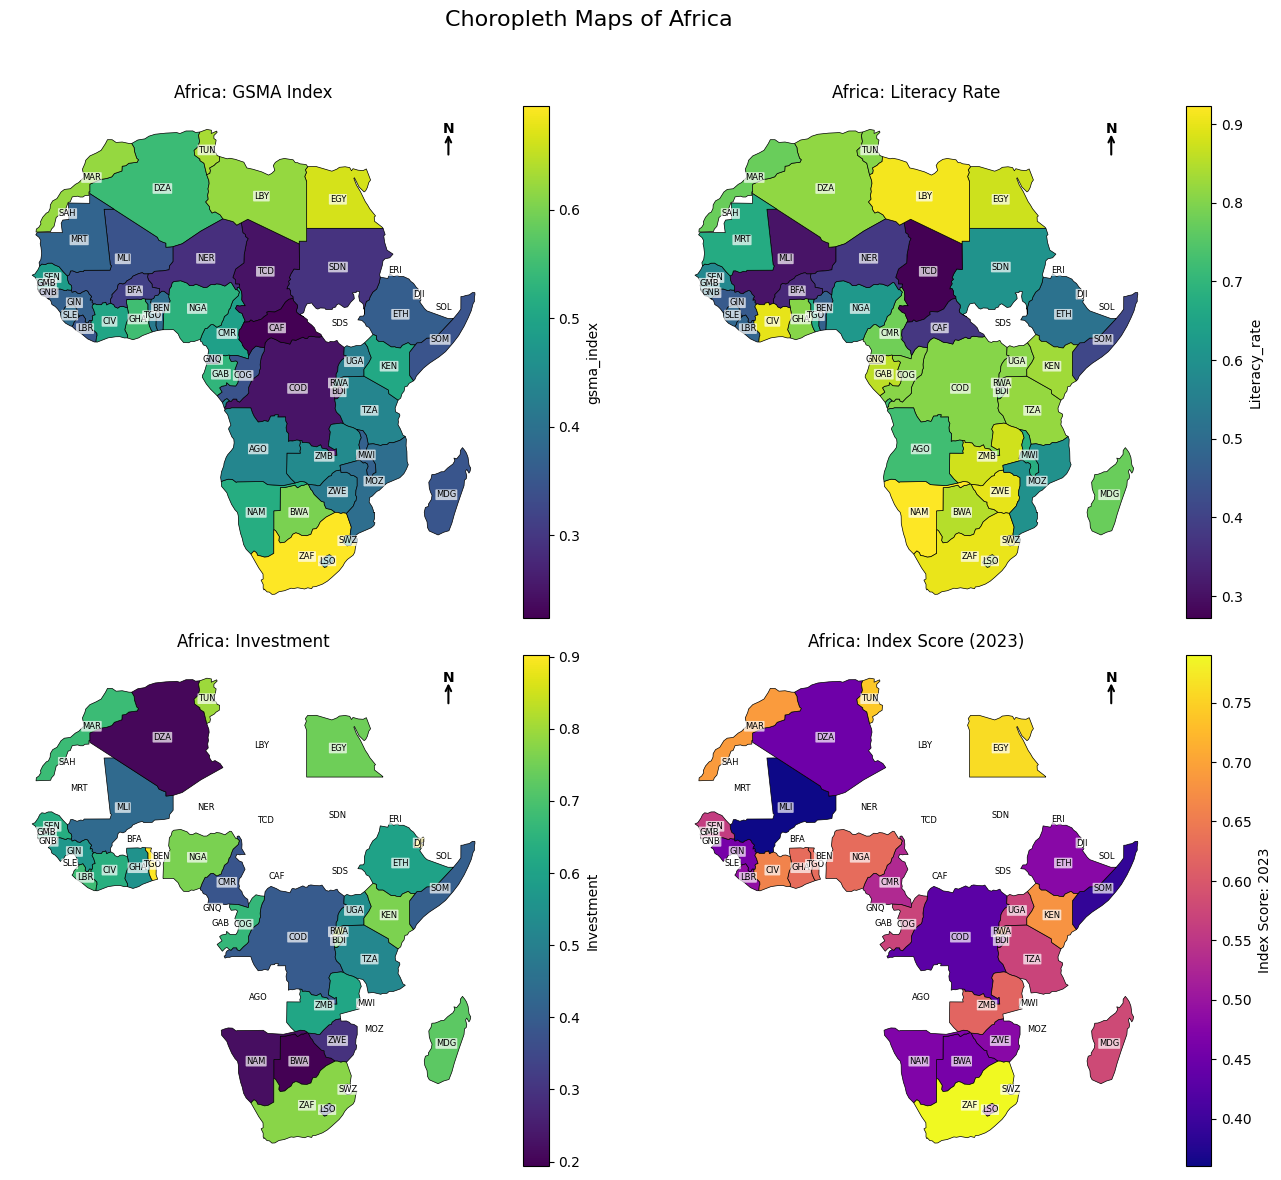

2x2 subplot map created successfully


In [31]:
# Memory optimization strategy:
# 1. Use simplified geometries
# 2. Reduced figure resolution
# 3. Optimize memory during plotting

def create_2by2_choropleth(africa_data, output_filename):
    # Simplify geometries to reduce memory usage even more
    simplified_africa = africa_data.copy()
    simplified_africa['geometry'] = simplified_africa['geometry'].simplify(tolerance=0.02)
    
    # Define columns to plot
    columns = ['gsma_index', 'Literacy_rate', 'Investment', 'Index Score: 2023']
    titles = ['Africa: GSMA Index', 'Africa: Literacy Rate', 
              'Africa: Investment', 'Africa: Index Score (2023)']
    cmaps = ['viridis', 'viridis', 'viridis', 'plasma']
    
    # Create a figure with 2x2 subplots (reduced size)
    fig, axes = plt.subplots(2, 2, figsize=(14, 12), dpi=100)
    axes = axes.flatten()
    
    # Plot each map
    for i, (column, title, cmap) in enumerate(zip(columns, titles, cmaps)):
        ax = axes[i]
        
        # Check if column has data
        if column in simplified_africa.columns and simplified_africa[column].notna().any():
            # Get min/max for colormap
            vmin = simplified_africa[column].min()
            vmax = simplified_africa[column].max()
            
            # Plot the data with a colormap
            simplified_africa.plot(column=column, 
                       ax=ax, 
                       cmap=cmap, 
                       edgecolor='black',
                       linewidth=0.5,
                       legend=False)
            
            # Create a simple colorbar
            sm = ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
            sm.set_array([])
            cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label(column)
            
            # Add ISO CODE labels for all countries
            for idx, row in simplified_africa.iterrows():
                # Get the ISO code
                if 'ISO CODE' in simplified_africa.columns:
                    code = row['ISO CODE']
                elif 'SOV_A3' in simplified_africa.columns:
                    code = row['SOV_A3']
                else:
                    continue  # Skip if no ISO code is available
                    
                # Skip if code is empty or NaN
                if pd.isna(code) or code == '':
                    continue
                    
                # Add the label
                ax.annotate(code, 
                        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                        ha='center', 
                        va='center', 
                        fontsize=6,  # Smaller font for the subplot layout
                        color='black',
                        bbox=dict(boxstyle="round,pad=0.1", 
                                fc="white", 
                                ec="none", 
                                alpha=0.7))
        else:
            ax.text(0.5, 0.5, f'No data available for {column}', 
                    ha='center', va='center', fontsize=12,
                    transform=ax.transAxes)
        
        # Add title
        ax.set_title(title, fontsize=12)
        
        # Add a simplified north arrow
        arrow_pos_x = 0.9
        arrow_pos_y = 0.9
        arrow_length = 0.05
        
        north_arrow = FancyArrowPatch((arrow_pos_x, arrow_pos_y), 
                                     (arrow_pos_x, arrow_pos_y + arrow_length),
                                     arrowstyle='->', 
                                     transform=ax.transAxes,
                                     mutation_scale=10, 
                                     lw=1.5, 
                                     color='black')
        ax.add_patch(north_arrow)
        ax.text(arrow_pos_x, arrow_pos_y + arrow_length * 1.1, 'N', 
                ha='center', va='center', fontsize=10, fontweight='bold',
                transform=ax.transAxes)
        
        # Remove axes
        ax.set_axis_off()
    
    # Add overall title
    plt.suptitle('Choropleth Maps of Africa', fontsize=16, y=0.98)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save figure
    plt.savefig(output_filename, dpi=150, bbox_inches='tight')
    
    # Display figure
    plt.show()
    
    # Close figure to free memory
    plt.close(fig)
    
    # Force garbage collection
    gc.collect()

# To use this function:
# Assuming 'africa' is your GeoDataFrame
try:
    # First make a copy with simplified geometries to reduce memory usage
    africa_simple = africa.copy()
    africa_simple['geometry'] = africa_simple['geometry'].simplify(tolerance=0.01)
    
    # Create the 2x2 subplot
    create_2by2_choropleth(africa_simple, 'africa_choropleth_maps_2x2.png')
    print("2x2 subplot map created successfully")
except Exception as e:
    print(f"Error creating maps: {e}")
    
    # If you still have memory issues, try these more aggressive memory-saving options:
    try:
        print("Trying with more aggressive memory optimization...")
        # Further simplify geometry
        africa_very_simple = africa.copy()
        africa_very_simple['geometry'] = africa_very_simple['geometry'].simplify(tolerance=0.05)
        
        # Reduce figure size further
        fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=75)
        # ... (rest of code would follow but with smaller figure size)
        print("Consider setting 'figsize=(10, 8), dpi=75' and simplify with tolerance=0.05")
    except Exception as e:
        print(f"Still encountering errors: {e}")
        print("Try creating individual maps instead of a subplot.")